In [2]:
%store -r dfObj1

In [3]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')

# make sure you have unicode strings [0] is the column of the sentences
X = vectorizer.fit_transform(dfObj1[0].values.astype('U')) 

true_k = 4

km = KMeans(n_clusters=4).fit(X)

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=2000, n_init=20)
Xt = model.fit_transform(X)

In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import numpy as np

In [7]:
# things with tf-idf score 
X = X.toarray()
fns =  np.array(vectorizer.get_feature_names()) # feature names/ordered by index

In [8]:
# retrieve labels with max score
labels = model.labels_ 
d = []
for n in sorted(np.unique(labels)):
    t = X[(labels == n)].sum(axis=0) #max tf/idf score cumulative/cluster
    words = fns[t == t.max()]
    d.append(",".join(words))

In [9]:
t = Xt.T # cluster distance space X transpose to be plotted with mpl

0
1
2
3


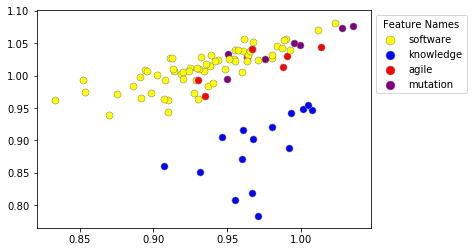

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt


### plot the clusters
fig, ax = plt.subplots(1,1)


cluster_color_dict = {0:'yellow', 1 :'blue', 2 :'red', 3:'purple'} # change these to desired colors
#cluster_color_dict = {0:'green', 1 :'blue', 2 :'red'} # change these to desired colors
for i in range(len(t[0])):

    ax.scatter(t[0][i], t[1][i], c= cluster_color_dict[labels[i]], edgecolors='grey', lw = 0.5, s = 50)
    
p1 = [] # legend patches 
for i in range(4):
    print(i)
    h = ax.scatter([],[], c= cluster_color_dict[i], 
                    edgecolors= 'grey', lw = 0.5, s = 80, label = d[i]) 
    p1.append(h)

l1 = ax.legend(handles = p1, title= 'Feature Names',  bbox_to_anchor = (1,1))

In [11]:
# save the figure
fig.savefig('Evaluation_SLR3_4clusters.png', dpi=100, bbox_inches='tight')

In [12]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 software
 process
 research
 quality
 studies
 development
 model
 study
 review
 literature
Cluster 1:
 knowledge
 project
 social
 management
 sharing
 software
 distance
 team
 projects
 cultural
Cluster 2:
 agile
 software
 agility
 scrum
 devices
 device
 cloud
 dase
 mobile
 pilot
Cluster 3:
 mutation
 test
 testing
 defects
 defect
 mutants
 software
 homs
 subjects
 subsuming


In [13]:
import pandas as pd

In [14]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dfObj1.index.values
cluster_map['cluster'] = model.labels_

In [16]:
cluster_map[cluster_map.cluster == 0].head(30)

,data_index,cluster
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
10,10,0
11,11,0
12,12,0


In [17]:
cluster_map[cluster_map.cluster == 0].tail(40)

,data_index,cluster
32,32,0
33,33,0
34,34,0
35,35,0
36,36,0
37,37,0
38,38,0
40,40,0
42,42,0
44,44,0


In [18]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
21,21,1
30,30,1
41,41,1
43,43,1
47,47,1
48,48,1
51,51,1
52,52,1
54,54,1
55,55,1


In [19]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
0,0,2
8,8,2
9,9,2
39,39,2
82,82,2
91,91,2
92,92,2


In [20]:
cluster_map[cluster_map.cluster == 3]

,data_index,cluster
14,14,3
17,17,3
20,20,3
63,63,3
64,64,3
68,68,3
86,86,3
